In [11]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
def crawl_price(date):
    r = requests.post('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + str(date).split(' ')[0].replace('-','') + '&type=ALL')
    ret = pd.read_csv(StringIO("\n".join([i.translate({ord(c): None for c in ' '}) 
                                        for i in r.text.split('\n') 
                                        if len(i.split('",')) == 17 and i[0] != '='])), header=0)
    ret = ret.set_index('證券代號')
    ret['成交金額'] = ret['成交金額'].str.replace(',','')
    ret['成交股數'] = ret['成交股數'].str.replace(',','')
    return ret

import datetime
import time
data = {}
n_days = 9
date = datetime.datetime.now()
fail_count = 0
allow_continuous_fail_count = 5
while len(data) < n_days:
    print('parsing', date)
    # 使用 crawPrice 爬資料
    try:
        # 抓資料
        data[date] = crawl_price(date)
        print('success!')
        fail_count = 0
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
        fail_count += 1
        if fail_count == allow_continuous_fail_count:
            raise
            break
    
    # 減一天
    date -= datetime.timedelta(days=1)
    time.sleep(10)
    
close = pd.DataFrame({k:d['收盤價'] for k,d in data.items()}).transpose()
close.index = pd.to_datetime(close.index)
close

parsing 2018-10-09 16:01:31.780023
success!
parsing 2018-10-08 16:01:31.780023
success!
parsing 2018-10-07 16:01:31.780023
fail! check the date is holiday
parsing 2018-10-06 16:01:31.780023
fail! check the date is holiday
parsing 2018-10-05 16:01:31.780023
success!
parsing 2018-10-04 16:01:31.780023
success!
parsing 2018-10-03 16:01:31.780023
success!
parsing 2018-10-02 16:01:31.780023
success!
parsing 2018-10-01 16:01:31.780023
success!
parsing 2018-09-30 16:01:31.780023
fail! check the date is holiday
parsing 2018-09-29 16:01:31.780023
fail! check the date is holiday
parsing 2018-09-28 16:01:31.780023
success!
parsing 2018-09-27 16:01:31.780023
success!


,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2018-10-09 16:01:31.780023,40.05,39.55,13.55,20.00,7.74,14.75,13.90,20.90,25.70,36.25,...,50.30,33.80,98.40,75.50,58.00,16.05,50.40,13.25,13.45,86.00
2018-10-08 16:01:31.780023,39.75,39.30,13.35,19.95,7.72,14.85,13.90,20.85,25.45,36.15,...,49.70,33.55,98.60,76.00,57.60,16.15,50.50,13.05,13.50,83.00
2018-10-05 16:01:31.780023,39.70,40.15,13.40,19.95,7.80,14.95,13.95,21.05,25.35,36.30,...,49.90,33.50,99.50,77.00,57.70,16.15,NaN,13.00,13.50,86.00
2018-10-04 16:01:31.780023,39.80,39.70,13.65,20.15,7.85,15.10,13.90,21.50,25.50,36.90,...,50.70,33.50,100.50,77.80,58.10,16.20,NaN,13.10,13.70,88.90
2018-10-03 16:01:31.780023,40.20,40.50,13.75,20.20,7.88,15.10,13.90,21.75,25.55,36.95,...,51.50,33.55,101.00,79.00,58.40,16.15,NaN,13.25,13.95,84.30
2018-10-02 16:01:31.780023,40.30,40.15,13.75,20.30,7.90,15.35,13.90,22.10,25.55,37.35,...,51.50,33.80,101.50,78.60,58.40,16.25,NaN,13.35,13.95,90.00
2018-10-01 16:01:31.780023,41.05,41.40,13.95,20.35,7.90,15.55,14.00,22.40,25.70,37.75,...,51.60,33.85,101.50,79.70,58.90,16.20,NaN,13.40,14.00,92.50
2018-09-28 16:01:31.780023,41.10,41.50,13.90,20.20,7.88,15.40,13.90,22.35,25.40,37.75,...,51.10,33.80,102.00,79.20,58.40,16.10,NaN,13.40,13.95,90.90
2018-09-27 16:01:31.780023,40.25,40.55,13.65,20.20,7.87,15.50,13.80,22.45,25.55,37.40,...,51.10,34.10,104.00,78.50,58.10,16.10,NaN,13.40,13.95,99.00


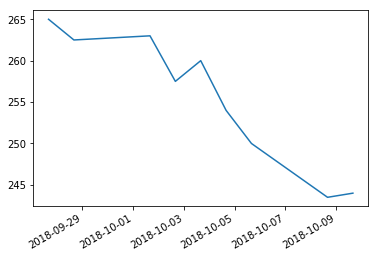

In [12]:
#import matplotlib.pyplot as plt

open = pd.DataFrame({k:d['開盤價'] for k,d in data.items()}).transpose()
open.index = pd.to_datetime(open.index)
high = pd.DataFrame({k:d['最高價'] for k,d in data.items()}).transpose()
high.index = pd.to_datetime(high.index)
low = pd.DataFrame({k:d['最低價'] for k,d in data.items()}).transpose()
low.index = pd.to_datetime(low.index)
volume = pd.DataFrame({k:d['成交股數'] for k,d in data.items()}).transpose()
volume.index = pd.to_datetime(volume.index)

tsmc = {
    'close':close['2330']['2018'].dropna().astype(float),
    'open':open['2330']['2018'].dropna().astype(float),
    'high':high['2330']['2018'].dropna().astype(float),
    'low':low['2330']['2018'].dropna().astype(float),
    'volume': volume['2330']['2018'].dropna().astype(float),
}
tsmc['close'].plot()

In [6]:
import talib

ModuleNotFoundError: No module named 'talib'

In [ ]:
def talib2df(talib_output):
    if type(talib_output) == list:
        ret = pd.DataFrame(talib_output).transpose()
    else:
        ret = pd.Series(talib_output)
    ret.index = tsmc['close'].index
    return ret;
talib2df(talib.abstract.STOCH(tsmc)).plot()
tsmc['close'].plot(secondary_y=True)